In [97]:
#! pip install nltk
#import nltk
#nltk.download('punkt')
#! pip install pandas
#nltk.download('wordnet')
#! pip install scikit-learn
#! pip install tweet-preprocessor
#! pip install transformers
#! pip install evaluate

Understand The essence of NLP

### Introduction to NLP
### Areas of application
1. Social media
2. Banking
4. Health care
5. Insurance
6. Defance
7. Cyber Security


<font color='red'> My goal here is to make you understand the evolution of NLP by using real-world use cases and NLP is a very broad subject it involves rules, equations, derivatives, formulas my goal is to show you how linguists and computer scientists thought through to solve language and kindle your curiosity to think on how you would solve it and let you explorer deeply in the space that interests you let's pick up a use case sentiment analysis and ponder on how we would have solved it.
<br>
Sentiment: refers to the emotional tone or attitude conveyed by a piece of text or speech. It can be expressed through the use of words, phrases, and other linguistic cues that indicate the author or speaker's subjective feelings or opinions about a particular topic, object, or situation.
<br>
Analysis: use of computational algorithms and machine learning techniques to identify and extract subjective information from text. and determine the emotional tone or attitude expressed in a piece of text.
<br>
In this tutorial, we will solve the use cases in English I encourage you to read through text encoding if you are trying to do NLP in other languages. Armed with basic knowledge of English like noun, verb, adjectives positive words negative words let's try solving the use case </font>

In [2]:
sample = [
    "I am not happy",
    "I am very happy",
    "I am happpy",
    "I am sad",
    "this is a cheap phone",
    "This movie is not great",
    "This great movie is not to be missed"
]

In [5]:
#rule 1 : if there is a positive word the sentiment is positive
#rule 2 : if there is a negitive word the sentiment is negitive

positive_dictionary = ["happy", "great"]
negative_dictionary = ["sad", "cheap"]

In [6]:
for sentence in sample:
    words = sentence.lower().split()
    if any(word in positive_dictionary for word in words):
        print(sentence, " :: positive")
    elif any(word in negative_dictionary for word in words):
        print(sentence, " :: negative")
    else:
        print(sentence, " :: nuteral")


I am not happy  :: positive
I am very happy  :: positive
I am happpy  :: nuteral
I am sad  :: negative
this is a cheap phone  :: negative
This movie is not great  :: positive
This great movie is not to be missed  :: positive


In [ ]:
# we got 4 right and 3 wrong , lets think of more rules

In [7]:
#rule 3 : If there is a negation word with positive word its negitive
#rule 4 : If there is a negation word with negitive word its nuteral

In [13]:
negation_dictionary = ["not"]

def print_sentiment(sample):
    for sentence in sample:
        words = sentence.lower().split()
        if any(word in positive_dictionary for word in words):
            if any(word in negation_dictionary for word in words):
                print(sentence, " :: negitive")
            else:
                print(sentence, " :: positive")
        elif any(word in negative_dictionary for word in words):
            if any(word in negation_dictionary for word in words):
                print(sentence, " :: nuteral")
            else:
                print(sentence, " :: negitive")
        else:
            print(sentence, " :: nuteral")

In [14]:
print_sentiment(sample)

I am not happy  :: negitive
I am very happy  :: positive
I am happpy  :: nuteral
I am sad  :: negitive
this is a cheap phone  :: negitive
This movie is not great  :: negitive
This great movie is not to be missed  :: negitive


In [15]:
# we got 5 right and 2 wrong, we are already seeing how we can build rules and how soon it can become complicated
# some of the rules we can thin through is
# Intensifiers - words like "very" will intensify the emotion
# Contextual clues - Lest assume we are searching for luxury hotels in this context the word "cheap" will be negitive 
# but when we are searching for budget stays the word "cheap" might be positive 
# Word order - the word order is important in the last example.

# now lets run the same function on a different sample
sample2 = [
    "I am not joyful",
    "I am very joyful",
    "I am happpy",
    "I am unhappy",
    "this is a inexpensive phone",
    "This movie is not exceptional !!",
    "This exceptional movie is not to be missed"
]

In [16]:
print_sentiment(sample2)

I am not joyful  :: nuteral
I am very joyful  :: nuteral
I am happpy  :: nuteral
I am unhappy  :: nuteral
this is a inexpensive phone  :: nuteral
This movie is not exceptional  :: nuteral
This exceptional movie is not to be missed  :: nuteral


### ERA 1

<font color='red'>
we got everything wrong , lets ponder on what we learn from this exercise
<br>

1. We need some kind of dictionary to look up positive words and negitive words.
2. We need some kind of dictionary to look up synonymes.
3. We need to correct spellings.
4. writing rules will get complex over time.
5. context is never accounted for.
6. handle punctuation, plurals etc.
7. Split words in a sentence.

Linguists, Researchers, computer scientists every one whoud have faced this kind of situation so they thought of
approching the problem one step at a time , first solving for words, then phrases, then understanding the syntax of english language, then understand the meaning of each word in the given sentence.

1. Lexical Processing
2. Syntactic Processing
3. Semantic Processing
    
Each step solves some specific NLP use cases and its limitations pushed researchers to come up with new 
paradigme of solving those problems and contributed to evolution of NLP

I encourage every one to read about Text Encoding, it is very viatl when your are processing non english language

https://docs.python.org/3/howto/unicode.html <br>
https://mothereff.in/utf-8
</font>

### What Is Lexical Processing ?

Lexical processing refers to the mental processes involved in the recognition, interpretation, and use of words and vocabulary. It involves understanding the meaning, pronunciation, and syntactic function of individual words in context, as well as accessing and retrieving them from memory. Lexical processing is a critical aspect of language comprehension and production, as it enables us to understand and produce language fluently and efficiently. It is an essential component of various language-related tasks, such as reading, writing, speaking, and listening.

<font color='red'>Here the focus is on word level understanding
Some of the applications might be span detector , when you find words like lottry , prize , luckey draw it can be
classified as spam , another application might be #tag trend analysis.<br><br>
Some of the early forms of lexical processing is using Regular expressions. Regular expressions, which are also known as regex, are a highly effective set of programming tools utilized for various tasks including extracting features from text, manipulating strings, and replacing stringsRegex to find patters in text like dates, emails IP adress, phone numbers, PIN codes etc.
</font>

Understanding Regex :<br>
https://docs.python.org/2/library/re.html#re.RegexObject <br>
https://regex101.com/

some of the basic steps in preprocessing text is

1. Tokenisation
2. Stop words removal
3. Stemming
4. Lemmatization

#### Tokenisation
 It is a proces to break the text into smaller unites it might be characters, words , sentences ,paragraph this depends on the down stream application. Each unit can be used as a feature. There are various types of pre built tokanizers available , we need to choose based on problem at hand.

In [19]:
sentence = "I have a doctors appointment at 5 o'clock. It will take me 2hrs to reach due to traffic,\
he'll soon leave , dont't know what to do."
print(sentence)

I have a doctors appointment at 5 o'clock. It will take me 2hrs to reach due to traffic,he'll soon leave , dont't know what to do.


In [20]:
#pyhton tokanizer
print(document.split())

['I', 'have', 'a', 'doctors', 'appointment', 'at', '5', "o'clock.", 'It', 'will', 'take', 'me', '2hrs', 'to', 'reach', 'due', 'to', "traffic,he'll", 'soon', 'leave', ',', "dont't", 'know', 'what', 'to', 'do.']


In [26]:
# Tokenising using nltk word tokenise
from nltk.tokenize import word_tokenize
words = word_tokenize(document)
print(words)

['I', 'have', 'a', 'doctors', 'appointment', 'at', '5', "o'clock", '.', 'It', 'will', 'take', 'me', '2hrs', 'to', 'reach', 'due', 'to', 'traffic', ',', 'he', "'ll", 'soon', 'leave', ',', "dont't", 'know', 'what', 'to', 'do', '.']


In [28]:
# Tokenising sentence using sent_tokenize . it splits text in different sentence using prtiod (.)
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(document)
print(sentences)

["I have a doctors appointment at 5 o'clock.", "It will take me 2hrs to reach due to traffic,he'll soon leave , dont't know what to do."]


### Tweet tokanizer
A tweet is a short message or post that is published on the social media platform Twitter. It is limited to a maximum of 280 characters, which includes letters, numbers, symbols, and spaces. Users can share their thoughts, opinions, news, images, videos, and links to other content through tweets.
Due to this character limitation users use sentences that dont adhear to english grammer has emojis and other complex special characters, word tokanizers cannot handel this well.

In [30]:
tweet = "i recently watched this film called kantara:). \
i totally loved it 😍. it was gr8 <3. #kantara #thrill 😎"

In [31]:
print(word_tokenize(tweet))

['i', 'recently', 'watched', 'this', 'film', 'called', 'kantara', ':', ')', '.', 'i', 'totally', 'loved', 'it', '😍', '.', 'it', 'was', 'gr8', '<', '3', '.', '#', 'kantara', '#', 'thrill', '😎']


The process of tokenization separates the emoji '<3' into '<' and '3', which is not desirable. Emojis hold significant value in areas such as sentiment analysis, where a happy or sad face alone can be a reliable predictor of sentiment. Additionally, hashtags are also split into two tokens during tokenization. Hashtags are used for searching specific topics or photos on social media platforms like Instagram and Facebook, where it's important to preserve the original hashtag as it is.

In [32]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
tknzr.tokenize(tweet)

['i',
 'recently',
 'watched',
 'this',
 'film',
 'called',
 'kantara',
 ':)',
 '.',
 'i',
 'totally',
 'loved',
 'it',
 '😍',
 '.',
 'it',
 'was',
 'gr8',
 '<3',
 '.',
 '#kantara',
 '#thrill',
 '😎']

It is evident that the system effectively manages both emojis and hashtags.

#### StopWords
Stopwords refer to words that have the highest frequencies in a given text and are generally considered of minimal importance.

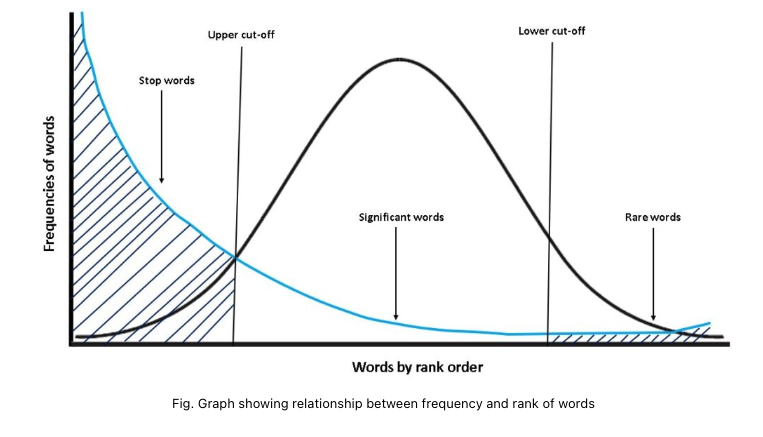

From the above graph we can see there are three reagions in which words are present :

1. Highly frequent reagion, called stop words, such as ‘is’, ‘an’, ‘the’.
2. Significant reagion, which are important words to understand the text.
3. Rarely reagion, rare words which are less important than significant words.

Why Stop words are removed ?
1. In applications like spam detection or search engines, stopwords are generally uninformative and hence are removed from the dataset. 
2. This leads to a reduction in the size of the data due to the high frequency of stop words.
3. This reduction results in faster computation on text data and the advantage of dealing with fewer features.

It is not right remove stop words always, it depends upon the the problem at hand expecally when you are building
1. Building a POS (Part of speech Tagging)
2. NER (named entity recognition)
3. Grammer correction

### Stemming and Lemmatization

Stemming is a process in natural language processing (NLP) that involves reducing inflected or derived words to their base or root form. The root form is also known as the "stem" of the word. The purpose of stemming is to normalize or standardize text data so that words with the same root can be grouped together, regardless of their inflections or derivations.

For example, the words "run," "runs," "running," and "runner" can all be reduced to their root form "run" through stemming. Similarly, the words "play," "played," "plays," and "playing" can be reduced to their root form "play."

Stemming algorithms typically use a set of heuristics or rules to identify the stem of a word. One common stemming algorithm is the __Porter stemming__ algorithm, which is a rule-based algorithm that uses a series of rules to remove suffixes from words. Another popular stemming algorithm is the __Snowball stemming__ algorithm, which is an extension of the Porter stemming algorithm and can be customized for different languages.

http://snowball.tartarus.org/algorithms/porter/stemmer.html
http://snowball.tartarus.org/


Lemmatization is another text normalization technique used in natural language processing (NLP). Like stemming, its goal is to reduce inflected or derived words to their base or root form. However, unlike stemming, lemmatization considers the context and part of speech of a word in order to determine its root form.

For example, the word "ran" can be reduced to its root form "run" through stemming, but it can also be reduced to its root form "run" through lemmatization, which takes into account that "ran" is the past tense of the verb "run." Similarly, the word "better" can be reduced to its root form "good" through lemmatization, which recognizes that "better" is the comparative form of the adjective "good."

Lemmatization algorithms typically use a dictionary or database containing the base forms of words, along with their __parts of speech__. The algorithm then analyzes the context of the word in the text to determine the appropriate base form.

Lemmatization is considered to be more accurate than stemming because it takes into account the context and part of speech of a word, which can help to avoid errors or incorrect reductions. However, it can also be more computationally expensive than stemming, and may require more processing power and resources.

Lets look at the differences between two different stemmers

In [33]:
text = "When the mail got successfully to Dover, in the course of the forenoon, the head drawer \
at the Royal George Hotel opened the coach-door as his custom was. He did it with some flourish of \
ceremony, for a mail journey from London in winter was an achievement to congratulate an adventurous traveller upon."

In [35]:
# import libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [36]:
#convert text to tokens
tokens = word_tokenize(text.lower())
print(tokens)

['when', 'the', 'mail', 'got', 'successfully', 'to', 'dover', ',', 'in', 'the', 'course', 'of', 'the', 'forenoon', ',', 'the', 'head', 'drawer', 'at', 'the', 'royal', 'george', 'hotel', 'opened', 'the', 'coach-door', 'as', 'his', 'custom', 'was', '.', 'he', 'did', 'it', 'with', 'some', 'flourish', 'of', '\\', 'ceremony', ',', 'for', 'a', 'mail', 'journey', 'from', 'london', 'in', 'winter', 'was', 'an', 'achievement', 'to', 'congratulate', 'an', 'adventurous', 'traveller', 'upon', '.']


In [37]:
stemmer = PorterStemmer()
porter_stemmed = [stemmer.stem(token) for token in tokens]
# snowball stemmer
stemmer = SnowballStemmer("english")
snowball_stemmed = [stemmer.stem(token) for token in tokens]

In [38]:
df = pd.DataFrame({'token': tokens, 'porter_stemmed': porter_stemmed, 'snowball_stemmed': snowball_stemmed})
df = df[['token', 'porter_stemmed', 'snowball_stemmed']]
df[(df.token != df.porter_stemmed) | (df.token != df.snowball_stemmed)]

,token,porter_stemmed,snowball_stemmed
4,successfully,success,success
10,course,cours,cours
21,george,georg,georg
23,opened,open,open
27,his,hi,his
29,was,wa,was
39,ceremony,ceremoni,ceremoni
49,was,wa,was
51,achievement,achiev,achiev
53,congratulate,congratul,congratul


From the above table we can see how each stemmer has performed and its output , i would encourage you to explore more.

In [41]:
### import necessary libraries
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]

In [42]:
df = pd.DataFrame(data={'token': tokens, 'stemmed': porter_stemmed, 'lemmatized': lemmatized})
df = df[['token', 'stemmed', 'lemmatized']]
df[(df.token != df.stemmed) | (df.token != df.lemmatized)]

,token,stemmed,lemmatized
4,successfully,success,successfully
10,course,cours,course
21,george,georg,george
23,opened,open,opened
26,as,as,a
27,his,hi,his
29,was,wa,wa
39,ceremony,ceremoni,ceremony
49,was,wa,wa
51,achievement,achiev,achievement


The most popular lemmatizer is the WordNet lemmatizer created by a team od researchers at the Princeton university. You can read more about it https://wordnet.princeton.edu/ , lemmatizer work more accurately when we passs POS tags

In [44]:
# Tokenize the sentence and tag the parts of speech
pos_tags = nltk.pos_tag(tokens)

# Map the POS tags to the format required by the lemmatizer
# ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'
pos_map = {'J': 'a', 'N': 'n', 'V': 'v', 'R': 'r'}

# Lemmatize the tokens with their respective POS tags
lemmatized_tokens = []
for token, pos in pos_tags:
    # Use the first letter of the POS tag to map to the correct WordNet POS tag
    wn_pos = pos_map.get(pos[0].upper(), 'n')
    lemmatized_token = wordnet_lemmatizer.lemmatize(token, pos=wn_pos)
    lemmatized_tokens.append(lemmatized_token)

In [45]:
df = pd.DataFrame(data={'token': tokens, 'stemmed': porter_stemmed, 'lemmatized': lemmatized_tokens})
df = df[['token', 'stemmed', 'lemmatized']]
df[(df.token != df.stemmed) | (df.token != df.lemmatized)]

,token,stemmed,lemmatized
3,got,got,get
4,successfully,success,successfully
10,course,cours,course
21,george,georg,george
23,opened,open,open
26,as,as,a
27,his,hi,his
29,was,wa,be
32,did,did,do
39,ceremony,ceremoni,ceremony


After passing POS tags we can see some differences in lemmatized tokens.

For running any machine learning on text, we should represent text in a format that you can feed into machine learning, all these algoritmems understand numbers. We need to find out ways to represent text in numbers. some of the popular approches to convert text to numbers is
1. Bag Of Words Representation
2. TF-IDF Representation

#### Bag Of Words

Bag of Words (BoW) is a commonly used technique for representing textual data in natural language processing. It is a way of converting text into numerical features that can be used for various machine learning tasks such as text classification, clustering, and information retrieval.

In the BoW representation, a document is represented as a bag (multiset) of its words, disregarding grammar and word order but keeping track of their frequency/presence of occurrence. The set of words used to represent a document is called the vocabulary. The BoW representation is typically constructed by following these steps:

1. Tokenization: The text is first divided into individual words or tokens.
2. Stop word: Remove stop words
3. Vocabulary construction: A unique set of words that occur in the text is created, which forms the vocabulary.
4. Counting: The frequency of occurrence of each word in the vocabulary is counted in the text, resulting in a vector of counts for each document.

We can either fill the cell with the frequency of a word or fill the cell with 0, in case the word is not present or 1, in case the word is present.

lets create BOW for below sentences
1. I am not happy
2. I am very happy
3. I am sad

after step 1,2 the vocab will be
Vocabulary: {"happy","sad","very"}

so the numerical representation would be
1. [0,0,0,1]
2. [0,0,1,1]
3. [0,0,1,0]

Countvectorizer is a method in sklearn package that converts a collection of text documents to a matrix of token counts.

In [56]:
# load all necessary libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
print (sample)

['I am not happy', 'I am very happy', 'I am happpy', 'I am sad', 'this is a cheap phone', 'This movie is not great', 'This great movie is not to be missed']


In [66]:
def preprocess(document):
    # change sentence to lower case
    document = document.lower()
    # tokenize into words
    words = word_tokenize(document)
    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    # join words to make sentence
    document = " ".join(words)
    # we can also try stemming or lemmatzation to reduce the dimensions
    return document

documents = [preprocess(document) for document in sample]
print(documents)

['happy', 'happy', 'happpy', 'sad', 'cheap phone', 'movie great', 'great movie missed']


In [67]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(documents)
print(bow_model.toarray())

[[0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0]
 [0 1 0 0 1 1 0 0]]


In [68]:
print(bow_model.shape)
print(vectorizer.get_feature_names_out())

(7, 8)
['cheap' 'great' 'happpy' 'happy' 'missed' 'movie' 'phone' 'sad']


#### TF-IDF
Although the bag of words representation is a widely used method for text representation, it has limitations as it relies solely on the word frequencies in a document. One could argue that word representation should not be solely based on frequency. An alternative method for representing documents is the TF-IDF representation, which is more sophisticated and preferred by many data scientists. This approach represents words in a matrix format that takes into account the importance of each word based on its frequency in the document and its frequency in the overall corpus.

TF-IDF model takes into the account the importance of each word. In the bag-of-words model, each word is assumed to be equally important, below is the formula.

$$\text{tf}(t, d) = \text{frequency of term t in document d} \div \text{total of terms in document d} $$

$$\text idf(𝑡,𝑑,𝐷) = \log \text{total number of documents} \div \text{total number of documents that have term t} $$


$$\text{tf-idf}(t, d, D) = \text{tf}(t, d) \times \text{idf}(t, d, D)$$
Where t denotes the terms; d denotes each document; D denotes the collection of documents.

The first part of the formula $tf(t, d)$ stands for term frequency, which is defined by the number of times a term $t$ occurs in a document $d$.

TfidfVectorizer is a method in sklearn package that converts a collection of text documents to a matrix of token counts.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(documents)

In [71]:
print(tfidf_model.toarray())

[[0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.70710678 0.         0.         0.         0.         0.
  0.70710678 0.        ]
 [0.         0.70710678 0.         0.         0.         0.70710678
  0.         0.        ]
 [0.         0.53828134 0.         0.         0.64846464 0.53828134
  0.         0.        ]]


In [73]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names_out())

,cheap,great,happpy,happy,missed,movie,phone,sad
0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0
4,0.707107,0.000000,0.0,0.0,0.000000,0.000000,0.707107,0.0
5,0.000000,0.707107,0.0,0.0,0.000000,0.707107,0.000000,0.0
6,0.000000,0.538281,0.0,0.0,0.648465,0.538281,0.000000,0.0


<font color='red'> We have learnt important concepts in Lexical processing , text normilization , Each concepte thate we have discussed so fare are very broad and deep, you can explore each topic out of your own interested lets put this concepts to work for the use case we started which is Sentiment analysis. </font>


#### Lexicon And Rule based sentiment analysis
<font color='red'>Lexicons and rule based approch , There are may lexicons SentiWordNet, SentiStrength,  Liu and Hu Lexicon one of the many popular approch is VADER (Valence Aware Lexicon and sEntiment Reasoner) it is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.<br>We have already done basic text preprocessing of text , we dont have to reinvent the wheel, lot pf libraries are published to preprocess text based on its source like , tweet , review, news etc. we will use one of those libraris for preprocessing, you can explore more based on your text source and use case 

https://towardsdatascience.com/social-media-sentiment-analysis-in-python-with-vader-no-training-required-4bc6a21e87b8

https://www.kaggle.com/code/sreejiths0/efficient-tweet-preprocessing
</font>

In [80]:
#Lets check some tweets
df = pd.read_csv('test.csv')
df.head()

,text,sentiment
0,Shanghai is also really exciting (precisely -...,positive
1,"Recession hit Veronique Branquinho, she has to...",negative
2,happy bday!,positive
3,http://twitpic.com/4w75p - I like it!!,positive
4,that`s great!! weee!! visitors!,positive


In [81]:
df.count()

text         2104
sentiment    2104
dtype: int64

In [82]:
df = df.dropna()
df = df.drop_duplicates()

In [83]:
df.count()

text         2104
sentiment    2104
dtype: int64

In [84]:
#Lets clean it
import preprocessor as preprocess

def preprocess_tweet(row):
    text = row['text']
    text = preprocess.clean(text)
    return text


In [85]:
df['text'] = df.apply(preprocess_tweet, axis=1)

In [86]:
df.head()

,text,sentiment
0,Shanghai is also really exciting (precisely --...,positive
1,"Recession hit Veronique Branquinho, she has to...",negative
2,happy bday!,positive
3,- I like it!!,positive
4,that`s great!! weee!! visitors!,positive


In [87]:
df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

/var/folders/cr/v1rfjrlj5c17x23nnswy0kv00000gn/T/ipykernel_27217/3862641593.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [88]:
df.head()

,text,sentiment
0,shanghai is also really exciting precisely sky...,positive
1,recession hit veronique branquinho she has to ...,negative
2,happy bday,positive
3,i like it,positive
4,that s great weee visitors,positive


In [89]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent_analyzer = SentimentIntensityAnalyzer()

def format_output(output_dict):
    polarity = "neutral"
    if(output_dict['compound']>= 0.05):
        polarity = "positive"
    elif(output_dict['compound']<= -0.05):
        polarity = "negative"
    return polarity

def predict_sentiment(text):
    output_dict =  sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

# Run the predictions
df["vader_prediction"] = df['text'].apply(predict_sentiment)

In [90]:
df.head()

,text,sentiment,vader_prediction
0,shanghai is also really exciting precisely sky...,positive,positive
1,recession hit veronique branquinho she has to ...,negative,negative
2,happy bday,positive,positive
3,i like it,positive,positive
4,that s great weee visitors,positive,positive


In [94]:
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

accuracy = accuracy_score(df['sentiment'], df['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(df['sentiment'], df['vader_prediction']))

Accuracy: 0.7761406844106464

              precision    recall  f1-score   support

    negative       0.94      0.64      0.76      1001
     neutral       0.00      0.00      0.00         0
    positive       0.83      0.90      0.86      1103

    accuracy                           0.78      2104
   macro avg       0.59      0.51      0.54      2104
weighted avg       0.88      0.78      0.81      2104



#### Pros: 
1. Trained data are not required.
2. Give good outcomes for domains whose words are present.
3. Quick access to the vocabulary of word meanings.

#### Cons:
1. Opinion terms with a specific content orientation.
2. Incapable of finding opinion terms with a specified content oriented domain that are not included in the lexicon.


Exercise :: Exprement with various preprocessing tequnics, lower case, lemmatiziation other lexicons and rule based systems and compare the results


Rule Based system dosenot learn anything from source documents , this is one of the biggest cons dude to evolving domain, slangs , useage of short forms , acronoiums . where are Machine-learning based NLP does not use any rules – rather it “learns”, or is “trained” by, source documents “annotated” by subject matter experts.

Lets look at some of building classifier. this exercise is by no means to teach you nitty gretty about the clarrsier of choice of algorithem or hyper parameter tuning , for that you can go thro **path setter algo link**

We have alread learnt couple of tequnics to convert text to numeric to make it sutaible for machine learning algorithmes, some of the other tequnics of feature engineering are also there like n-gram, noun phrase etc.

For our learning purposes let use use TF-IDF feature.

Read Train and Test data, the data is take from "https://www.kaggle.com/competitions/tweet-sentiment-extraction/data", i have removed few colums and nutral class label to make the exercise simpler.

In [103]:
import warnings
warnings.filterwarnings('ignore')
import preprocessor as preprocess
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [104]:
train_df.head()

,text,sentiment
0,Sooo SAD I will miss you here in San Diego!!!,negative
1,my boss is bullying me...,negative
2,what interview! leave me alone,negative
3,"Sons of ****, why couldn`t they put them on t...",negative
4,2am feedings for the baby are fun when he is a...,positive


As i previously mentioned ther are lot of libraries in pyhton which give you high level abstraction so that you focus on the problem rather that wrinting code ground up , preprocessor is one such library available to help you clean tweet kind of text. we can also build oure own custome function if required we will see both.

In [106]:
# using 3rd party libraries to preprocess , same function as shown above
def preprocess_tweet(row):
    text = row['text']
    text = preprocess.clean(text)
    return text

In [107]:
import random
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# Using custome preprocess function convert sentence to lower case, remove stopwords 
# apply lemmatization/stemming on sentence
def custom_preprocess(document, stem=True):
    document = document.lower()
    words = word_tokenize(document)
    words = [word for word in words if word not in stopwords.words("english")]
    if stem:
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    document = " ".join(words)

    return document

In [110]:
train_df['text'] = train_df.apply(preprocess_tweet, axis=1)
train_df['text'] = train_df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [111]:
train_df.head()

,text,sentiment
0,sooo sad i will miss you here in san diego,negative
1,my boss is bullying me,negative
2,what interview leave me alone,negative
3,sons of why couldn t they put them on the rele...,negative
4,am feedings for the baby are fun when he is al...,positive


We can see all the special characters removed , sentence is converted to lower case , extra white space are removed, now lets use custom function to remove stop words and stemming

In [113]:
train_df['text'] = train_df['text'].apply(custom_preprocess)

In [114]:
train_df.head()

,text,sentiment
0,sooo sad miss san diego,negative
1,boss bulli,negative
2,interview leav alon,negative
3,son put releas alreadi bought,negative
4,feed babi fun smile coo,positive


we can see stop words ahve been removed , and setmming has converted bullying to bulli , sons to son etc. now lets convert the text to ti-idf representation

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.03)
tfidf_vec = vectorizer.fit_transform(train_df['text'])

In [118]:
pd.DataFrame(tfidf_vec.toarray(), columns = vectorizer.get_feature_names_out())

,day,feel,get,go,good,got,great,happi,hope,im,...,mother,one,realli,see,thank,think,time,today,want,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16361,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we can see it converted it to **16363 rows × 25 columns** where 25 is the number of features it selected based on max_df=0.9, min_df=0.03 we supplied , ther are various hyperparameters in in TfidfVectorizer you can exprement with.

Lets replace the sentiment lavel with 1 and 0

In [119]:
train_df['sentiment'].replace(['negative', 'positive'],[0, 1], inplace=True)

In [120]:
train_df.head()

,text,sentiment
0,sooo sad miss san diego,0
1,boss bulli,0
2,interview leav alon,0
3,son put releas alreadi bought,0
4,feed babi fun smile coo,1


In [121]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [122]:
# Learn the vocab from train data and transforem
X_train = vectorizer.fit_transform(train_df['text'])
Y_train = train_df['sentiment'].values

In [123]:
# Load Test Data and do the same preprocessing done for train data
df_test = pd.read_csv('test.csv')

In [124]:
df_test['text'] = df_test.apply(preprocess_tweet, axis=1)
df_test['text'] = df_test['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df_test['text'] = df_test['text'].apply(custom_preprocess)
df_test['sentiment'].replace(['negative', 'positive'],[0, 1], inplace=True)

In [125]:
# Transform test data based on vecod learnt in train data
X_test = vectorizer.transform(df_test['text'])
Y_test = df_test['sentiment'].values

In [126]:
mnb = MultinomialNB()
model_mnb = mnb.fit(X_train,Y_train)
X_test_pred_mnb = model_mnb.predict(X_test)
print("Classification report:-\n\n",classification_report(Y_test,X_test_pred_mnb),"\n")

Classification report:-

               precision    recall  f1-score   support

           0       0.69      0.48      0.57      1001
           1       0.63      0.80      0.71      1103

    accuracy                           0.65      2104
   macro avg       0.66      0.64      0.64      2104
weighted avg       0.66      0.65      0.64      2104
 



We can see the accuracy on test data is 65% which is way less than a simple rule based system, lets change few some parameterand check.

In [127]:
vectorizer = TfidfVectorizer(max_features=100)
X_train = vectorizer.fit_transform(train_df['text'])
Y_train = train_df['sentiment'].values
X_test = vectorizer.transform(df_test['text'])
Y_test = df_test['sentiment'].values
mnb = MultinomialNB()
model_mnb = mnb.fit(X_train,Y_train)
X_test_pred_mnb = model_mnb.predict(X_test)
print("Classification report:-\n\n",classification_report(Y_test,X_test_pred_mnb),"\n")

Classification report:-

               precision    recall  f1-score   support

           0       0.79      0.68      0.73      1001
           1       0.74      0.84      0.79      1103

    accuracy                           0.76      2104
   macro avg       0.77      0.76      0.76      2104
weighted avg       0.77      0.76      0.76      2104
 



We can see the accuracy jumped to 76% by changing max_features=100 , which means it has created a matrix of **16363 rows × 100 columns** where 100 is the number of features. i will let you play around the features , preprocessing , and other hyperparameters. Let you think about bias, over fitting, corss-validation and other concepts you have learnt in **path setter link**

I will also encourage you to explore other Lexical Processing like concepts		
1. Canonicalisation
2. Phonetic Hashing
3. Edit Distance
4. Spell Corrector
5. Pointwise Mutual Information

I will touch about concepts that we will use in this note book other cpncepts are left for further reading, this is done concesiously to keep the tutorail pravtical rather than theoritical.

### ERA 2

In the previous they tried to represent text in numerica form using stastical methods , word frequency etc where order of the word was not considered, this did not give machines the power to understand meaning of words. The wese a brod field of NLP called **Syntatic Processing** where text parsers were built to take word order into account like part-of-speech tagging , dependency parsing i encourage you to read about parsing.

I will dive into Semantics of Text , Semantic processing is about understanding the meaning of a given piece of text.what dose that mean.

lets take up a sentence "pakistan was batteling hard to win against india, finally lost by 4 wickets". we understand the text is about cricket even tough the word cricket is not present , the word wickets gives a context about the sentence. we need to teaching machines to process text in similar way.

DIAGRAM lexical -> syntatic -> semantic
DIAGRAM of entities - entity tyoes - concepts
I order to answer questions like "what dose Siamese eat" it should understand that its a cat breed , carnivorus etc.

Read about Arity and Renification

In order to understand the meaning to give better answers companies u=built knowledge graphs
https://schema.org/docs/gs.html
https://schema.org/docs/financial.html

Assositating symantic to a word is very difficult and completely depends on the context , some of the kind of relationshisp built are 

Synonyms : Words that have a similar meaning 
Antonyms : Words that are opposite in meaning
Hypernyms and hyponyms : generic term is hypernym , specific instance of hypernym is hyponym , vehical-> bus 
Homonymy and polysemy : Words having different meanings but the same spelling , bank , bark

There are many more relations like this . In order to achive this nlp community started building database like WordNet and ConceptNet which stores rich relationships between words , concepts


Distributional Semantics : Distributional semantics is the dominant and to this day most successful approach to semantics in computational linguistics.  John Firth had said ‘You shall know a word by the company it keeps’. the basic idea to quantify the similarity is words which occur in similar contexts are similar to each other.

The end goal is to represent words in numeric form which we call as a vector , and make sure that vector encompases the meaning of the word.

There was various tequnics that were applied (read through the below methods)
1. The term-occurrence context matrix 
2. The term-term context matrix 

Example of term-term context matrix below

Conside the below snippet of sentences

the pizzeria for a while, drinking a beer at a table
hell, I'd meet you, drink a glass of beer
books, she changes her dress, drank a glass of cold water
men picked up their beers sipped the and put them back
to trust his intution she sipped from the champange glass
foos itself . even when he shipped his cold beer

the co-occurrence matrix for 'drink' and 'sip' based on the above sentences in a five-word context window (i.e., five words to the left and five words to the right). is as below

| | beer| book|	champagne|	change|	cold| dress| food |	glass |	hell | intuition | man | meet |	pick | pizzeria | put |	table |	trust |	water |	while |
| --- | --- | --- | --- | --- | --- |--- | --- |--- | --- |--- | --- |--- | --- |--- | --- |--- | --- |--- | --- |
Drink| 2	|1	|0	|1	|1	|1	|0	|2	|1	|0	|0	|1	|0	|1	|0	|1	|0	|1 |1 |
Sip	 | 2	|0	|1	|0	|1	|0	|1	|1	|0	|1	|1	|0	|1	|0	|1	|0	|1	|0 |0 |


Although the sample size is small and not sufficient to draw strong conclusions about the meaning of "sip" and "drink" based on their distribution, some basic patterns are already apparent. Both words are frequently associated with beverage names such as beer, champagne, and water, as well as other terms related to drinking and dining like food, glass, pizzeria, and table. Three collocates are shared by both verbs: beer, cold, and glass. If a larger sample were available, it is likely that more shared collocates of this type would emerge, while other cells would remain largely empty. This example demonstrates how a word's distribution can reveal certain aspects of its meaning.


these methods had many short commings some of which are
1. proper meaning of polysemic words are not captured
2. Matrix will be larger and sparse (rows as the size of the vocabulary, and most cells will have the value 0)

As you might have observed, the frequency and co-occurrence matrices possess extensive dimensions, equivalent to the size of the vocabulary V. This poses a significant challenge since manipulating such enormous matrices renders them almost unfeasible for practical purposes.
The objective of word embeddings is precisely to provide a condensed, low-dimensional variant of the co-occurrence matrices.

Some of the approches to generate Word embeddings are:

1. Frequency-based approach: Reducing the term-document matrix using a dimensionality reduction technique such as SVD
2. Prediction based approach: The embeddings are learned by a neural network that is relatively simple, and its primary purpose is to forecast the output words based on the input words.

I encourage to read about these approches. Lets look at how to use word2vec in python


The representation of words has been a longstanding task in natural language processing (NLP).The main underlying principle is known for decades, as explained by Firth (1957). This principle was based on the idea that the meaning of aword can be understood by its surrounding company (i.e., the words in its context). 

#### 2001 
with the introduction of the first neural language model. This is one of the first times a neural network, a deep learning network, was used to predict future words in a sentence, using a feed forward neural network. That predicting future words in a sentence,ia a concept that come up a lot in language modeling.
read about https://proceedings.neurips.cc/paper/2000/hash/728f206c2a01bf572b5940d7d9a8fa4c-Abstract.html

#### 2013
WordEmbeddings , main inovation is pretraining word embeddings on large unlablled corpus.please read about **skip-gram and CBOW**

In [128]:
import nltk
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

Train Word2Vec on Sentences

In [131]:
corpus  = ["I like apples",
               "apples good for health",
               "apples are green in colour",
               "green apple is grown in india",
               "most apples are red"
]
tokens = [sent.split() for sent in corpus]
tokens[:2]

[['I', 'like', 'apples'], ['apples', 'good', 'for', 'health']]

In [133]:
## https://radimrehurek.com/gensim/models/word2vec.html check out all the parametets here
## we are using defaults
model = Word2Vec(tokens,min_count=1)

In [134]:
model.wv['apples']

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [135]:
#Similarity between word vectors is measures using Cosine similarity
model.wv.most_similar("apples",topn=5)

[('apple', 0.21617458760738373),
 ('for', 0.09310111403465271),
 ('grown', 0.09291722625494003),
 ('health', 0.07963486760854721),
 ('colour', 0.06285078823566437)]

In [203]:
#Lets train a big corpus , this ia cleaned wikipedia corpus , download link http://mattmahoney.net/dc/text8.zip
sentences = word2vec.Text8Corpus('text8')

In [204]:
print(sentences)

In [205]:
model = Word2Vec(sentences)

In [143]:
model.wv.most_similar("king")

[('prince', 0.7457886338233948),
 ('throne', 0.7134958505630493),
 ('queen', 0.7117762565612793),
 ('emperor', 0.7086041569709778),
 ('kings', 0.6862139701843262),
 ('constantine', 0.659803569316864),
 ('regent', 0.6584054231643677),
 ('elector', 0.6578490734100342),
 ('castile', 0.6571164131164551),
 ('aragon', 0.6475844383239746)]

Neural word embeddings have been proven to contain useful information about concepts and entities, and provide a generalization boost to many NLP applications (Goldberg, 2017). Surprisingly,these representations have also been shown to exhibit linear relationships between words in the vector space, demonstrated by analogy. For example,
Mikolov et al. (2013b) showed that a simple operation such as **king-man+woman** will result in a point near queen in the vector space, lets see this example

In [144]:
#### Semantic regularities captured in word embeddings
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.6714180707931519),
 ('prince', 0.6268436908721924),
 ('throne', 0.6233434081077576),
 ('emperor', 0.60627281665802),
 ('princess', 0.598137617111206)]

In [145]:
model.wv.most_similar(positive=['woman', 'hero'], negative=['man'], topn=5)

[('heroine', 0.6339489817619324),
 ('villain', 0.6316521763801575),
 ('protagonist', 0.6293601393699646),
 ('heroic', 0.6233524084091187),
 ('warrior', 0.6177541017532349)]

Lets See How to generate embeddings for train and test data , we will also train a simple Nural Network using our pretrained glove embedding

In [154]:
#lets first see to generate embedding for a data in data frame fro this we will use a samller test data
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
# run the same preprocessing
#preprocess train file
df_train['text'] = df_train.apply(preprocess_tweet, axis=1)
df_train['text'] = df_train['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df_train['text'] = df_train['text'].apply(custom_preprocess)
df_train['sentiment'].replace(['negative', 'positive'],[0, 1], inplace=True)

#preprocess test file
df_test['text'] = df_test.apply(preprocess_tweet, axis=1)
df_test['text'] = df_test['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df_test['text'] = df_test['text'].apply(custom_preprocess)
df_test['sentiment'].replace(['negative', 'positive'],[0, 1], inplace=True)

# Get vocabulary
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(df_train['text'])
X_test_bow = vectorizer.transform(df_test['text'])

In [153]:
# Lets load a pretrained tweet embedding
import gensim.downloader
# this is downloaded in ~/gensim-data
glove_vectors = gensim.downloader.load('glove-twitter-50')

In [156]:
import numpy as np

embeddings_dict = {}
word_index = vectorizer.vocabulary_
num_words = len(word_index)
embedding_matrix = np.zeros((num_words, 50))
for word, i in word_index.items():
    embedding_vector = None
    try:
        embedding_vector = glove_vectors[word]
    except KeyError:
        # do nothing
        pass
    if embedding_vector is not None:
        embeddings_dict[word] = embedding_vector
        
def apply_embedding(df, column_name):
    # Tokenize the text in the column
    df['tokens'] = df[column_name].apply(word_tokenize)
    # Look up the embeddings for each token and average them
    df['embedding'] = df['tokens'].apply(lambda x: np.mean([embeddings_dict.get(token, np.zeros(50)) 
                                                            for token in x], axis=0))
    # Drop the 'tokens' column
    df.drop('tokens', axis=1, inplace=True)
    return df

In [157]:
df_test = apply_embedding(df_test,'text')

In [159]:
df_test.head()

,text,sentiment,embedding
0,shanghai also realli excit precis skyscrap gal...,1,"[0.21830795950760754, 0.2740010761966308, -0.0..."
1,recess hit veroniqu branquinho quit compani shame,0,"[0.12479700360979352, 0.31859285277979715, 0.2..."
2,happi bday,1,"[-0.694025, 0.654075, 0.2414975, 0.20033601, 0..."
3,like,1,"[-0.094661, 0.13413, 0.21436, 0.0081264, 0.046..."
4,great weee visitor,1,"[0.061243996, 0.20274101, -0.5060533, -0.31346..."


When data is trained from large scale corpora like these they started to notice Bias. Mainly two kind of bias

**Direct Bias**: Tearms like "foot ball" are loser to male and "nurse" are closer to female.
**InDirect Bias**: The reason why "teacher" is more closely associated with "volleyball" than "football" in the embedding is due to the more subtle correlations present, specifically a stronger association between "teacher" and females.

In [211]:
print(model.wv.similarity("nurse","female"))
print(model.wv.similarity("nurse","male"))

0.2740438
0.23617189


In [215]:
print(model.wv.similarity("teacher","volleyball"))
print(model.wv.similarity("teacher","football"))

0.21817592
0.20012663


Lets Build a Simple Nural Network For classifing tweets using Pretrained glove embedding

In [161]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten,Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_train['text'])
X_train = tokenizer.texts_to_sequences(df_train['text'])
X_train = pad_sequences(X_train, maxlen=50)

# Convert the labels to one-hot encoding
y_train = to_categorical(df_train['sentiment'])
X_test = tokenizer.texts_to_sequences(df_test['text'])
X_test = pad_sequences(X_test, maxlen=50)

# Convert the labels to one-hot encoding
y_test = to_categorical(df_test['sentiment'])

2023-03-18 16:38:32.309050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [163]:
# Create an embedding matrix for the Keras Embedding layer
embedding_dim = 50
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = glove_vectors[word]
    except KeyError:
        # do nothing
        pass
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [164]:
# Define the Keras model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix],
                    input_length=50, trainable=False))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            687500    
                                                                 
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 128)               320128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,007,886
Trainable params: 320,386
Non-trainable params: 687,500
_________________________________________________________________


In [165]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
512/512 [==============================] - 2s 3ms/step - loss: 0.5150 - accuracy: 0.7486 - val_loss: 0.4260 - val_accuracy: 0.8004
Epoch 2/10
512/512 [==============================] - 2s 3ms/step - loss: 0.4391 - accuracy: 0.7965 - val_loss: 0.4168 - val_accuracy: 0.8013
Epoch 3/10
512/512 [==============================] - 2s 3ms/step - loss: 0.4007 - accuracy: 0.8202 - val_loss: 0.4137 - val_accuracy: 0.8066
Epoch 4/10
512/512 [==============================] - 2s 3ms/step - loss: 0.3637 - accuracy: 0.8404 - val_loss: 0.4161 - val_accuracy: 0.8099
Epoch 5/10
512/512 [==============================] - 2s 3ms/step - loss: 0.3346 - accuracy: 0.8503 - val_loss: 0.4098 - val_accuracy: 0.8099
Epoch 6/10
512/512 [==============================] - 2s 3ms/step - loss: 0.3034 - accuracy: 0.8746 - val_loss: 0.4114 - val_accuracy: 0.8042
Epoch 7/10
512/512 [==============================] - 2s 3ms/step - loss: 0.2793 - accuracy: 0.8843 - val_loss: 0.4292 - val_accuracy: 0.8104
Epoch 

In [166]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.8084600567817688


By Using default parameters we are getting about 80% Accuracy

#### RNN and CNN
During the same time period, from 2013 to 2014, we witnessed the emergence of recurrent neural networks (RNNs) and convolutional neural networks (CNNs), which are commonly referred to as RNNs and CNNs. Although these architectures were not new to the 21st century, with the first vanilla RNN introduced in 1990 and the Long Short Term Memory network introduced in 1997, it was during this time period that they gained traction for natural language processing tasks due to the publication of a PhD thesis by Ilya Sutskever in 2013.

In [199]:
# Lets use Bi-LSTM and do tweet classification
from keras.layers import Dense, LSTM, Bidirectional

model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 50, weights=[embedding_matrix], 
                    input_length=50, trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 50, 50)            687500    
                                                                 
 bidirectional_10 (Bidirecti  (None, 50, 128)          58880     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 787,726
Trainable params: 100,226
Non-trainable params: 687,500
_________________________________________________________________


In [200]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
512/512 [==============================] - 33s 51ms/step - loss: 0.4486 - accuracy: 0.7894 - val_loss: 0.3732 - val_accuracy: 0.8313
Epoch 2/10
512/512 [==============================] - 32s 62ms/step - loss: 0.3716 - accuracy: 0.8335 - val_loss: 0.3421 - val_accuracy: 0.8512
Epoch 3/10
512/512 [==============================] - 33s 64ms/step - loss: 0.3351 - accuracy: 0.8528 - val_loss: 0.3273 - val_accuracy: 0.8598
Epoch 4/10
512/512 [==============================] - 40s 78ms/step - loss: 0.3117 - accuracy: 0.8676 - val_loss: 0.3216 - val_accuracy: 0.8579
Epoch 5/10
512/512 [==============================] - 37s 73ms/step - loss: 0.2930 - accuracy: 0.8767 - val_loss: 0.3028 - val_accuracy: 0.8679
Epoch 6/10
512/512 [==============================] - 37s 72ms/step - loss: 0.2751 - accuracy: 0.8846 - val_loss: 0.2999 - val_accuracy: 0.8636
Epoch 7/10
512/512 [==============================] - 37s 72ms/step - loss: 0.2521 - accuracy: 0.8960 - val_loss: 0.3051 - val_accuracy:

In [201]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.8669201731681824


we can see we have got around 86% accuracy , we have not optimized any hyperparameter , preprocessing or embedding

After this we started the see the raise of sequence to sequence modeling to handle variable length input and variable lenght output , where a encoder and decoder was usually a RNN, encoder encoded all the information to a fixed lenght state. the deceoder would use this to construct the output, the problem with this is compressing that sequence into a fixed length vector made it hard to remember long term information. So attentions came into picture.In 2017 a paper called "Attention is all you need" comes out, introducing the transformer.

And because of how well received this research was in 2017, pre-trained language models became a hot topic in natural language processing by 2018. Models like BERT, GPT, and T5, learned general language rules after being pre-trained on enormous corpora.

**Transfer learning** involves reusing a pre-trained model for a second task after it has been trained on a first task. The process involves selecting a source model from a model repository, which is then used as the starting point for training on a second, usually related, task. The benefit of transfer learning is that the knowledge gained from the first task can be transferred to the second task, avoiding the need to start from scratch. In natural language processing, transfer learning involves pre-training a model on an unlabeled text corpus to learn general language and context, and then fine-tuning it on a specific downstream task using a labeled dataset. This approach allows for state-of-the-art results, as the pre-trained model has a deep understanding of natural language that can be transferred to the downstream task with a smaller dataset.

<font color='red'>Transfer Learning.In general, transfer learning is where one model is trained for a task, and then it's reused as the starting point for a second task. The approach is pretty much like this. You select a source model, which is some pre-trained model generally from a repository of models. We've actually already seen this in our code when we were loading up a pre-trained BERT model where we called BERT based uncased, that's a source model. Those all come from a model repository from Hugging Face . Once you select that source model, you then reuse it and train on a second task. That pre-trained model is basically the starting point for a second usually related task, and it's trained on data pertaining to that second task. The idea is, you are taking the learnings from the first task and transferring it to a second task. The benefits here, are you benefit from the overall learning from the first task, you don't have to start over and teach a transformer-based model about general language, because in theory, it should already know generic language rules, you simply need to change it up slightly to train on a downstream task. We'll then take training data for a second task whether it's a question and answering task, a classification task, or a token classification task, and use that training data to update BERT or other transformer models, given some additional layers. So if we're doing a classification task, we'll add on a classification layer on top of a pre-trained BERT. Now, in NLP, the idea of transfer learning is pretty much the same. A model is pre-trained on an unlabeled text corpora on an unsupervised or sometimes considered semi-supervised task that generally doesn't have a useful objective. It's basically just meant to learn language and context in general. And when we get to our different transformer models we'll see that each one of them has a different corpora that it's been trained on, on a different kind of task. After that's been done, the model is then fined-tuned or updated on a specific natural language processing downstream task using a labeled dataset usually. And that labeled data set is generally much smaller in comparison. If the idea, again, is if we simply had trained the model only on the downstream data, which is a little bit smaller, and not done any of the pre-training and tried not to transfer anything over, we would not be able to achieve those state of the art results that were seeking. The idea that these pre-trained language models had so much built in understanding of natural language that we could simply transfer that knowledge over to a relatively simple task with a smaller dataset and not have to worry about training a blank deep learning architecture entirely from scratch.</font>

### Raise of Large Language Models (LLM's)

In the field of AI, Foundation Models, which are also known as Extremely large models, have been transforming the landscape. Unlike models designed for a specific task, Foundation Models are intended to serve as the basis for a broad range of downstream tasks. Typically, these models are pre-trained on large volumes of unlabelled data and subsequently fine-tuned on a small set of labeled examples from a downstream task. Large Language Models (LLMs), such as GPT-3, are prime examples of Foundation Models. They have demonstrated human-level performance in various tasks and even exceeded it in some cases. ChatGPT, which is a variant of GPT-3, has broken new ground in AI by being capable of performing various tasks with just natural language instructions and conversing with users to correct its output.

At the heart of transformer and transformer-based architectures' language learning process are language modeling tasks. These tasks focus on understanding language rules, including how words are used in sentences and how sentences are treated in larger corpora. In a language modeling task, a model is trained to predict a missing word or token in a sequence of words or tokens. Generally speaking, there are two types of language models.

1. Auto Encoding - Its goal is to learn representation of entire sequence by predicting tokens give both past and future tokens 
I like ______, because ______ is a winner
GPT Family of models
Used in Natural Language Generation

2. Auto Regressive - Its goal is to predict a future token give either the past tokens or the future tokens but not both
	I like ______  : pridict future tokens given past tokens
	______ is a winner : pridict past tokens given future tokens
BERT Family of models
Ued in Natural language Understanding


In [218]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

In [219]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [220]:
# Define a function to preprocess and tokenize text
def preprocess(text):
    text = text.lower()
    encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors='tf')
    return encoded_text

# Define a function to predict the sentiment of text
def predict_sentiment(text):
    encoded_text = preprocess(text)
    output = model(encoded_text['input_ids'], attention_mask=encoded_text['attention_mask'])
    sentiment = tf.argmax(output.logits, axis=1).numpy()[0]
    if sentiment == 0:
        return "Negative"
    else:
        return "Positive"

# Example usage
text = "I love this product, it's amazing!"
sentiment = predict_sentiment(text)
print(f"The sentiment of '{text}' is {sentiment}")

The sentiment of 'I love this product, it's amazing!' is Positive


In [230]:
predictions_df = pd.DataFrame(columns=["prediction"])

In [233]:
# Define a function to predict the sentiment of text
def predict_sentiment_numeric(text):
    encoded_text = preprocess(text)
    output = model(encoded_text['input_ids'], attention_mask=encoded_text['attention_mask'])
    sentiment = tf.argmax(output.logits, axis=1).numpy()[0]
    if sentiment == 0:
        return 0
    else:
        return 1

In [235]:
for index, row in df_test.iterrows():
    prediction = predict_sentiment_numeric(row['text'])
    # Store the prediction in the new data frame
    predictions_df.loc[index] = [prediction]


In [236]:
print(accuracy_score(df_test["sentiment"], predictions_df["prediction"]))

0.5247148288973384


The low accurecy is because it has only learned the general rules of language, these pretrained models are not trained to solve any specific task, we need to fine tune on down stream task.

In [244]:
#! pip install pandas
#! pip install nltk
#! pip install scikit-learn
#! pip install tweet-preprocessor
#! pip install transformers
#! pip install evaluate
#! pip install tensorflow

### BERT
BERT, which stands for Bi-directional Encoder Representation from Transformers, derives its bi-directionality from being an auto-encoding language model. This allows BERT to comprehensively comprehend the sequence's intent, goal, and meaning by incorporating all sequence aspects. The "E" in BERT's name refers to its use of only the encoder stack from the transformer architecture. BERT is pre-trained on two tasks.

1. Masked Language Model.
2. Next Sentence Prediction.

In [250]:
import pandas as pd

base_path = "/Users/avia/personal/nlp_tutorials/code/top-down-nlp/Chapter1/"
train_df = pd.read_csv(base_path+'train.csv')
test_df = pd.read_csv(base_path+'test.csv')

train_df.rename(columns={'sentiment': 'label'}, inplace=True)
test_df.rename(columns={'sentiment': 'label'}, inplace=True)

train_df['label'].replace(['negative', 'positive'],[0, 1], inplace=True)
test_df['label'].replace(['negative', 'positive'],[0, 1], inplace=True)

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
from datasets import load_dataset
from datasets import Dataset

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

train_datasets = Dataset.from_pandas(train_df)
test_datasets = Dataset.from_pandas(test_df)

def preprocess(text):
    encoded_text = tokenizer(text['text'], padding=True, truncation=True, return_tensors='tf')
    return encoded_text

tokenized_train_datasets = train_datasets.map(preprocess, batched=True)
tokenized_test_datasets = test_datasets.map(preprocess, batched=True)

tf_train_dataset = tokenized_train_datasets.remove_columns(["text"]).with_format("tensorflow")
tf_eval_dataset = tokenized_test_datasets.remove_columns(["text"]).with_format("tensorflow")

train_features = {x: tf_train_dataset[x].to_tensor() for x in tokenizer.model_input_names}
train_tf_dataset = tf.data.Dataset.from_tensor_slices((train_features, tf_train_dataset["label"]))
train_tf_dataset = train_tf_dataset.shuffle(len(tf_train_dataset)).batch(8)

eval_features = {x: tf_eval_dataset[x].to_tensor() for x in tokenizer.model_input_names}
eval_tf_dataset = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset["label"]))
eval_tf_dataset = eval_tf_dataset.batch(8)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

model.fit(train_tf_dataset, validation_data=eval_tf_dataset, epochs=3)

In [ ]:
model.summary()

In [ ]:
import evaluate
import numpy as np

preds = model.predict(eval_tf_dataset)["logits"]

class_preds = np.argmax(preds, axis=1)
print(preds.shape, class_preds.shape)

metric = evaluate.load("accuracy")
metric.compute(predictions=class_preds, references=tf_eval_dataset["label"])

### GPT

The name GPT stands for Generative Pre-trained Transformers. GPT is classified as an auto-regressive language model, meaning it predicts tokens using only one side of the context, the past context. The "generative" aspect of its name is derived from this ability. GPT is constructed using the decoder stack of the Transformer architecture.

It also gave raise to below paradime of fine tuning training and prompt base training

1. Few-Shot learning : the model is provided with a task discription and few examples that fit the context window
2. One-Shot Learning : the model is provided with a task discription and 1 example of the task
3. Zero-Shot Learning : the model is provided with a task discription , thats it.

Few-shot learning, one-shot learning, and zero-shot learning all stem from the fact that GPT is pre-trained on a large web text corpus and has encountered natural instances of people performing natural language processing tasks. When we refer to few-shot, zero-shot, or one-shot learning, we are asking the model to perform a task it may not have encountered before, given a prompt or context. Few-shot learning involves providing the model with a task description and as many examples as possible, up to the model's maximum input length of 1,024 tokens for GPT-2. Zero or one-shot learning is a subset of few-shot learning where either zero or one example is provided. In zero-shot learning, the model is given a task description but no examples. The prompt is used to instruct the model on what to do. One-shot learning entails providing the model with a task description and only one example of the task.

We will look at prompt based pretraining of GPT on sentiment analysis

In [253]:
#!pip3 install torch torchvision torchaudio

In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling, GPT2LMHeadModel, pipeline, \
                         GPT2Tokenizer
import pandas as pd
from datasets import Dataset

In [ ]:
import pandas as pd

base_path = "/Users/avia/personal/nlp_tutorials/code/top-down-nlp/Chapter1/"
train_df = pd.read_csv(base_path+'train.csv')
test_df = pd.read_csv(base_path+'test.csv')

In [ ]:
test_df.head()

In [ ]:
MODEL = 'distilgpt2'
tokenizer = GPT2Tokenizer.from_pretrained(MODEL)
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
#add two prompts, one for each task
SENTIMENT_PROMPT = 'Sentiment Task'
SENTIMENT_TOKEN = '\nSentiment:'

In [ ]:
train_df['sentiment_text'] = f'{SENTIMENT_PROMPT}\nReview: ' + train_df['text'] + SENTIMENT_TOKEN + 
' ' + train_df['sentiment'].astype(str)

In [ ]:
# Check format sample
print(train_df['sentiment_text'].head(1).tolist()[0])

In [ ]:
training_examples = train_df['sentiment_text'].tolist()
print(len(training_examples))
sentiment_task_df = pd.DataFrame({'text': training_examples})

In [ ]:
data = Dataset.from_pandas(sentiment_task_df)

In [ ]:
def preprocess(examples):
    return tokenizer(examples['text'], truncation=True)

data = data.map(preprocess, batched=True)
data = data.train_test_split(train_size=.8)

In [ ]:
model = GPT2LMHeadModel.from_pretrained(MODEL)

In [ ]:
# Lets first check what the pretrined GPT will output
sentiment_text_sample = f'{SENTIMENT_PROMPT}\nReview: {text_sample}{SENTIMENT_TOKEN}'
generator = pipeline('text-generation', model=GPT2LMHeadModel.from_pretrained('gpt2'), tokenizer=tokenizer)
for generated_text in generator(sentiment_text_sample, num_return_sequences=1, max_length=num_tokens + 1):
    print(generated_text['generated_text'])
    print('-------')

In [ ]:
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

In [ ]:
training_args = TrainingArguments(
    output_dir="./gpt2_sentiment", #The output directory
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=2, # number of training epochs
    per_device_train_batch_size=32, # batch size for training
    per_device_eval_batch_size=32,  # batch size for evaluation
    logging_steps=50,
    load_best_model_at_end=True,
    evaluation_strategy='epoch',
    save_strategy='epoch'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=data['train'],
    eval_dataset=data['test'],
    data_collator=data_collator
)

trainer.evaluate()

In [ ]:
trainer.train()

In [ ]:
trainer.evaluate()

In [ ]:
trainer.save_model()

In [ ]:
loaded_model = GPT2LMHeadModel.from_pretrained('./gpt2_sentiment')
generator = pipeline('text-generation', model=loaded_model, tokenizer=tokenizer)

In [ ]:
text_sample, score =  train_df.sample(1)[['text', 'sentiment']].values[0]

In [ ]:
print(text_sample)
print(score) 
num_tokens = len(tokenizer(text_sample)['input_ids'])
print(num_tokens)

In [ ]:
sentiment_text_sample = f'{SENTIMENT_PROMPT}\nReview: {text_sample}{SENTIMENT_TOKEN}'

In [ ]:
for generated_text in generator(sentiment_text_sample, num_return_sequences=1, max_length=num_tokens + 1):
    print(generated_text['generated_text'])